In [1]:
#Reading Data
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data= pd.read_csv("credit_card_transactions-ibm_v2.csv", dtype={'Zip': str})

In [4]:
#Conversion of Data to Binary Attributes
data['Is Fraud?'] = data['Is Fraud?'].replace(['Yes'], 1)
data['Is Fraud?'] = data['Is Fraud?'].replace(['No'], 0)

data['Use Chip'] = data['Use Chip'].replace(['Swipe Transaction'], 0)
data['Use Chip'] = data['Use Chip'].replace(['Online Transaction'], 1)
data['Use Chip'] = data['Use Chip'].replace(['Chip Transaction'], 2)


data['Time'] = pd.to_datetime(data['Time'], format='%H:%M').dt.time
data['Time'] = data['Time'].apply(lambda x: x.hour * 3600 + x.minute * 60)

data['Amount'] = pd.to_numeric(data['Amount'].replace('[\$,]', '', regex=True), errors='coerce')


data['Merchant State'].fillna('Not Given', inplace=True)

#Transforming to Categorical Data
data['Merchant City'] = pd.Categorical(data['Merchant City']).codes
data['Merchant State'] = pd.Categorical(data['Merchant State']).codes
data['Merchant Name'] = pd.Categorical(data['Merchant Name']).codes
data['Errors?'] = pd.Categorical(data['Errors?']).codes

#Handle Zip
#Merchant State
nan_mask = data['Zip'].isna()
most_frequent_zip = data.groupby('Merchant State')['Zip'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
data.loc[nan_mask, 'Zip'] = data.loc[nan_mask, 'Merchant State'].map(most_frequent_zip)

#City
nan_mask = data['Zip'].isna()
most_frequent_zip = data.groupby('Merchant City')['Zip'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
data.loc[nan_mask, 'Zip'] = data.loc[nan_mask, 'Merchant City'].map(most_frequent_zip)

#Name
nan_mask = data['Zip'].isna()
most_frequent_zip = data.groupby('Merchant Name')['Zip'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
data.loc[nan_mask, 'Zip'] = data.loc[nan_mask, 'Merchant Name'].map(most_frequent_zip)

data['Zip'].fillna('00000', inplace=True)

data['Zip'] = data['Zip'].astype('object')

In [2]:
data.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0,0,2002,9,1,06:21,$134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,NaN,No
1,0,0,2002,9,1,06:42,$38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
2,0,0,2002,9,2,06:22,$120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
3,0,0,2002,9,2,17:45,$128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,NaN,No
4,0,0,2002,9,3,06:23,$104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,NaN,No


In [3]:
data.to_csv('Preprocessed Data.csv', index=False)

In [8]:
nan_check = data.isnull().sum()
print(nan_check)
data.info()

User              0
Card              0
Year              0
Month             0
Day               0
Time              0
Amount            0
Use Chip          0
Merchant Name     0
Merchant City     0
Merchant State    0
Zip               0
MCC               0
Errors?           0
Is Fraud?         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24386900 entries, 0 to 24386899
Data columns (total 15 columns):
 #   Column          Dtype  
---  ------          -----  
 0   User            int64  
 1   Card            int64  
 2   Year            int64  
 3   Month           int64  
 4   Day             int64  
 5   Time            int64  
 6   Amount          float64
 7   Use Chip        int64  
 8   Merchant Name   int32  
 9   Merchant City   int16  
 10  Merchant State  int16  
 11  Zip             object 
 12  MCC             int64  
 13  Errors?         int8   
 14  Is Fraud?       int64  
dtypes: float64(1), int16(2), int32(1), int64(9), int8(1), object(1)
memory usa

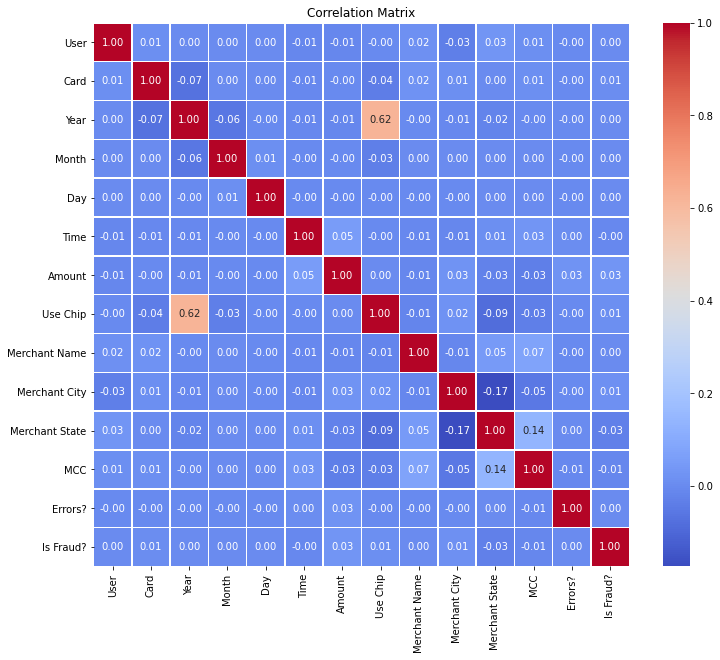

In [6]:
# Correlation Matrix of Preprocessed Data

corr_matrix = data.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()